<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Analytics/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (1143, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8      

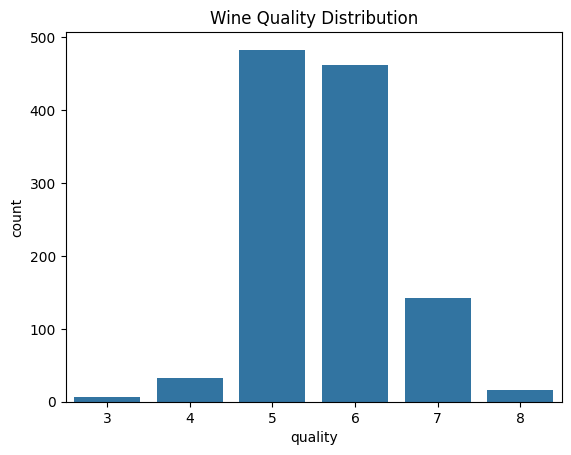


Random Forest Results
Accuracy: 0.6899563318777293
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 70  5  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229


SGD Classifier Results
Accuracy: 0.5851528384279476
Confusion Matrix:
 [[ 0  2  4  0  0]
 [ 0 75 12  8  1]
 [ 0 31 39 29  0]
 [ 0  2  4 20  0]
 [ 0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# 2. Load the Dataset
df = pd.read_csv("/content/WineQT.csv")  # Rename if needed to match actual CSV file
print("Shape:", df.shape)
print(df.head())

# 3. Data Exploration
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['quality'].value_counts())

# Optional: Visualize quality distribution
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

# 4. Features & Target
X = df.drop('quality', axis=1)
y = df['quality']

# 5. Split & Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 6. Train Classifier Models
# -----------------------------

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# SGD Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
sgd_preds = sgd_model.predict(X_test)

# Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)

# -----------------------------
# 7. Evaluation Function
# -----------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# -----------------------------
# 8. Evaluate All Models
# -----------------------------
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SGD Classifier", y_test, sgd_preds)
evaluate_model("SVC", y_test, svc_preds)
